In [1]:
import numpy as np 
import pandas as pd
from sklearn import datasets 
from sklearn.metrics import accuracy_score
from sklearn import linear_model as lm 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.model_selection import train_test_split
import regex as re
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Cleaning

In [2]:
movies = pd.read_csv('movies_metadata.csv')
oscar = pd.read_csv('database.csv')
genres = pd.read_csv('MovieGenre.csv', encoding = "ISO-8859-1")

/tmp/ipykernel_171/1988109775.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [62]:
display(movies.head(), oscar.head(), genres.head())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson


,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [63]:
#renaming the Film column to original_title to merge two of the datasets
oscar = oscar.rename(columns = {'Film' : 'original_title'})

In [64]:
#if a movie contains a null value in the oscars dataset, they did not win an Oscar. 
#therefore, winners have a value of 1 and losers have a value of 0.  
oscar['Winner'] = [0 if pd.isna(x) else 1 for x in oscar['Winner']]

In [65]:
#merging the movies and oscars dataset on the titles
merged = pd.merge(movies, oscar, on = 'original_title', how = 'left')

In [66]:
#if the movie was not nominated, it would show up as a null value in the combined dataset
#therefore, those movies are denoted with a 0 for the nominated column
merged['Nominated'] = [0 if pd.isna(x) else 1 for x in merged['Winner']]

In [67]:
#filling in all the winner NA values with 0 because they did not win
merged['Winner'] = merged['Winner'].fillna(0)

In [68]:
#renaming the imdbId column to merge another dataset
genres = genres.rename(columns = {'imdbId':'imdb_id'})

In [69]:
#getting rid of any rows that do not have an imdb_id 
merged = merged[merged['imdb_id'].isnull() != True]

In [70]:
#the merged dataset has letters in front of the id, so we used regex to extract only the numbers
merged['imdb_id'] = merged['imdb_id'].str.extract(r'([0-9]+)').astype(int)

In [71]:
#merging the previously merged dataset with the genres dataset based on the imdb_id column
#we used a left join because we only want the data on movies that are included in the merged dataset
combined_movies = pd.merge(merged, genres, on = 'imdb_id', how = 'left')

In [72]:
combined_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Ceremony,Award,Winner,Name,Nominated,Imdb Link,Title,IMDB Score,Genre,Poster
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,68.0,Special Achievement Award,1.0,John Lasseter,1,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [73]:
#removing the rows that have null values for the release_date
combined_movies = combined_movies[combined_movies['release_date'].isna() == False]

In [74]:
#using regex, we extracted the release date year for each movie 
#we also removed any rows without a Year value
combined_movies['Year'] = combined_movies['release_date'].str.extract(pat = r'(\d{4})')
combined_movies = combined_movies[combined_movies['Year'].isna() == False]

In [75]:
#we changed the Year column from a string type into a int type
#afterwards, we removed movies before 1927 and after 2015. 
#the Oscars did not begin until 1927 and the movies dataset only goes up until 2015. 
combined_movies['Year'] = combined_movies['Year'].astype(int)
combined_movies = combined_movies[combined_movies['Year'] >= 1927]
combined_movies = combined_movies[combined_movies['Year'] <= 2015]

In [76]:
#if the movie belongs in a series, we gave it a value of 1. 
#if not, the movie is given a value of 0.
combined_movies['belongs_to_collection'] = [0 if pd.isna(x) else 1 for x in combined_movies['belongs_to_collection']]

In [77]:
#checking for null values in the columns that could be potential variables in our models 
combined_movies['adult'].isnull().value_counts()

False    43935
Name: adult, dtype: int64

In [78]:
combined_movies['budget'].isnull().value_counts()

False    43935
Name: budget, dtype: int64

In [79]:
combined_movies['genres'].isnull().value_counts()

False    43935
Name: genres, dtype: int64

In [80]:
combined_movies['original_language'].isnull().value_counts()

False    43928
True         7
Name: original_language, dtype: int64

In [81]:
#there are some null values, so we have to fill them in or remove them
#since we have over 40,000 values, we can remove 7 values without it having any impact on our models
combined_movies = combined_movies[combined_movies['original_language'].isnull() == False]

In [82]:
combined_movies['original_title'].isnull().value_counts()

False    43928
Name: original_title, dtype: int64

In [83]:
combined_movies['popularity'].isnull().value_counts()

False    43928
Name: popularity, dtype: int64

In [84]:
combined_movies['production_companies'].isnull().value_counts()

False    43928
Name: production_companies, dtype: int64

In [85]:
combined_movies['production_countries'].isnull().value_counts()

False    43928
Name: production_countries, dtype: int64

In [86]:
combined_movies['revenue'].isnull().value_counts()

False    43928
Name: revenue, dtype: int64

In [87]:
combined_movies['runtime'].isnull().value_counts()

False    43699
True       229
Name: runtime, dtype: int64

In [88]:
#there are some null values in the runtime column. 
#however, just like original_language, we can just remove the movies that do not have these values
combined_movies = combined_movies[combined_movies['runtime'].isnull() == False]

In [89]:
combined_movies['status'].isnull().value_counts()

False    43624
True        75
Name: status, dtype: int64

In [90]:
#checking which movies have a null value for the status column
combined_movies[combined_movies['status'].isnull()].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Ceremony,Award,Winner,Name,Nominated,Imdb Link,Title,IMDB Score,Genre,Poster
199,False,0,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,56088,114435,en,The Show,A documentary about the culture of hip-hop. Th...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt114435,The Show (1995),6.8,Documentary|Music,https://images-na.ssl-images-amazon.com/images...
793,False,0,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.tsquare.tv/film/,52059,113147,en,The Gate of Heavenly Peace,The Gate of Heavenly Peace is a feature-length...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113147,The Gate of Heavenly Peace,8.8,Documentary,https://images-na.ssl-images-amazon.com/images...
1496,False,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,40506,119644,en,Meet Wally Sparks,Wally Sparks is a tabloid TV show reporter who...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt119644,Meet Wally Sparks (1997),5.2,Comedy,https://images-na.ssl-images-amazon.com/images...
4440,False,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,109472,289175,en,Ek Je Aachhe Kanya,NaN,...,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN
6504,False,0,0,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",NaN,51927,334416,en,Stevie,In 1995 Director Steve James (Hoop Dreams) ret...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt334416,Stevie (2002),8.0,Documentary,https://images-na.ssl-images-amazon.com/images...


In [91]:
#checking the values within the status column
combined_movies['status'].value_counts()

Released           43333
Rumored              224
Post Production       53
In Production          8
Planned                5
Canceled               1
Name: status, dtype: int64

In [92]:
#we removed the movies without a status value
combined_movies = combined_movies[combined_movies['status'].isnull() == False]

In [93]:
combined_movies['vote_average'].isnull().value_counts()

False    43624
Name: vote_average, dtype: int64

In [94]:
combined_movies['vote_count'].isnull().value_counts()

False    43624
Name: vote_count, dtype: int64

In [95]:
combined_movies['Winner'].isnull().value_counts()

False    43624
Name: Winner, dtype: int64

In [96]:
combined_movies['Nominated'].isnull().value_counts()

False    43624
Name: Nominated, dtype: int64

In [97]:
combined_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Ceremony,Award,Winner,Name,Nominated,Imdb Link,Title,IMDB Score,Genre,Poster
0,False,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,68.0,Special Achievement Award,1.0,John Lasseter,1,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,False,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,False,1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,False,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,False,1,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,NaN,NaN,0.0,NaN,0,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [98]:
#dropping columns that we are not going to use in our models
combined_movies = combined_movies.drop(columns = ['homepage', 'spoken_languages', 'production_companies', 'genres', 'id', 'imdb_id', 'overview', 'poster_path', 'release_date', 'Award', 'Ceremony', 'Name', 'tagline', 'production_countries', 'Imdb Link', 'Title', 'Poster', 'title'])


In [99]:
#checking how many null values there are in the Genre column
combined_movies['Genre'].isnull().value_counts()

False    38718
True      4906
Name: Genre, dtype: int64

In [100]:
#removing the movies without a genre
combined_movies = combined_movies[combined_movies['Genre'].isnull() == False]

In [101]:
#using regex, we extracted the main genre from each movie
combined_movies['Genre'] = combined_movies['Genre'].str.extract(r'(\w*)')

In [102]:
#there are still too many points, so we decided to use movies without an IMDB Score of above 7
#this reduces the dataset to around 12000 movies which is much better than 40000
highratedmovies = combined_movies[combined_movies['IMDB Score'] > 7]

In [103]:
highratedmovies.head()

,adult,belongs_to_collection,budget,original_language,original_title,popularity,revenue,runtime,status,video,vote_average,vote_count,Year,Winner,Nominated,IMDB Score,Genre
0,False,1,30000000,en,Toy Story,21.946943,373554033.0,81.0,Released,False,7.7,5415.0,1995,1.0,1,8.3,Animation
5,False,0,60000000,en,Heat,17.924927,187436818.0,170.0,Released,False,7.7,1886.0,1995,0.0,0,8.2,Action
9,False,1,58000000,en,GoldenEye,14.686036,352194034.0,130.0,Released,False,6.6,1194.0,1995,0.0,0,7.2,Action
12,False,1,0,en,Balto,12.140733,11348324.0,78.0,Released,False,7.1,423.0,1995,0.0,0,7.1,Animation
13,False,0,44000000,en,Nixon,5.092,13681765.0,192.0,Released,False,7.1,72.0,1995,0.0,1,7.1,Biography


In [104]:
#removing more columns that will not be included in the model
#these columns have too many unique values that cannot be used as a dummy variabe
highratedmovies = highratedmovies.drop(columns = ['adult', 'original_language', 'original_title'])

In [105]:
#using dummy variables on the genre and status
movies_dummy = pd.get_dummies(highratedmovies, prefix=['status', 'Genre'], columns=['status', 'Genre'])

In [106]:
#changing column into an int type
movies_dummy['video'] = movies_dummy['video'].astype(int)

In [107]:
#changing column into a float type
movies_dummy['popularity'] = movies_dummy['popularity'].astype(float)

In [108]:
#changing column into an int type
movies_dummy['budget'] = movies_dummy['budget'].astype(int)

In [109]:
movies_dummy = movies_dummy.rename(columns = {'IMDB Score' : 'IMDB_Score'})

In [110]:
#splitting the dataset into a training and testing set
train = movies_dummy[movies_dummy['Year'] <= 2000].drop_duplicates()
test = movies_dummy[movies_dummy['Year'] > 2000].drop_duplicates()

In [111]:
#regression -- predict revenue
r_ytr = train["revenue"]
r_xtr = train.drop(columns = ["revenue"])
r_yte = test["revenue"]
r_xte = test.drop(columns = ["revenue"])

#classification -- predict whether or not the movie will be nominated for an Oscar
c_ytr = train["Nominated"]
c_xtr = train.drop(columns = ["Nominated"])
c_yte = test["Nominated"]
c_xte = test.drop(columns = ["Nominated"])

# Baseline Model

In [112]:
train['Nominated'].value_counts()

0    6052
1     806
Name: Nominated, dtype: int64

In [113]:
#predict that all movies do not get nominated for an oscar
y_test = np.repeat(0, test.shape[0])
accuracy_score(y_test, test['Nominated'])

0.9592147894034686

# Linear Regression

In [114]:
def VIF(df, col):
    vals = sm.add_constant(df[col]).values
    num_col = len(col) + 1
    vif = [variance_inflation_factor(vals, i) for i in range(num_col)]
    return pd.Series(vif[1:], index = col)

In [115]:
linreg1 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity+ runtime + video + vote_average + vote_count + Year + status_Released + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     737.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:39   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.568e+05
Df Residuals:                    6839   BIC:                         2.569e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.715e+

In [116]:
#remove video (p-value: 1.000)
linreg2 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity+ runtime + vote_average + vote_count + Year + status_Released + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     780.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:39   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.568e+05
Df Residuals:                    6840   BIC:                         2.569e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.715e+

In [117]:
#remove status_released (p-value: .961)
linreg3 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity+ runtime + vote_average + vote_count + Year + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     829.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:39   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6841   BIC:                         2.569e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.744e+

In [118]:
#remove vote_average (p-value: .790)
linreg4 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity+ runtime + vote_count + Year + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     885.3
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:39   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6842   BIC:                         2.569e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.727e+

In [119]:
#remove Year (p-value: .285)
linreg5 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity+ runtime + vote_count + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg5.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     948.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6843   BIC:                         2.568e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.358e+

In [120]:
#remove runtime (p-value: .256)
linreg6 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg6.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1021.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6844   BIC:                         2.568e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.257e+

In [121]:
#remove Genre_Drama (p-value: .202)
linreg7 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation + Nominated + Winner', data = train).fit()
print(linreg7.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6845   BIC:                         2.568e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.313e+

In [122]:
#remove Genre_Animation (p-value: .259)
linreg8 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Nominated + Winner', data = train).fit()
print(linreg8.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1206.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6846   BIC:                         2.568e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.313e+

In [123]:
#remove Genre_Documentary (p-value: .228)
linreg9 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Comedy + Genre_Crime + Genre_Action + Nominated + Winner', data = train).fit()
print(linreg9.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1327.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6847   BIC:                         2.568e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.197e+

In [124]:
#remove Genre_Comedy (p-value: .228)
linreg10 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Crime + Genre_Action + Nominated + Winner', data = train).fit()
print(linreg10.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1474.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6848   BIC:                         2.568e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.272e+

In [125]:
#remove Genre_Action (p-value: .096)
linreg11 = smf.ols(formula = 'revenue ~ IMDB_Score + belongs_to_collection + budget + popularity + vote_count + Genre_Crime + Nominated + Winner', data = train).fit()
print(linreg11.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1657.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:48:40   Log-Likelihood:            -1.2836e+05
No. Observations:                6858   AIC:                         2.567e+05
Df Residuals:                    6849   BIC:                         2.568e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.361e+

In [126]:
#check if VIF > 5 for any columns
col_names = ['IMDB_Score', 'belongs_to_collection', 'budget', 'popularity', 'vote_count', 'Genre_Crime', 'Nominated', 'Winner']
VIF(train, col_names)             

IMDB_Score               1.094793
belongs_to_collection    1.056619
budget                   1.499091
popularity               2.143803
vote_count               2.427014
Genre_Crime              1.014696
Nominated                1.464878
Winner                   1.371226
dtype: float64

In [127]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [128]:
def rmse(model, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    se = (y_test - y_pred) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [129]:
linreg11_rmse = rmse(linreg11, train, 'revenue')
print('RMSE on testing: ', linreg11_rmse)

RMSE on testing:  32550889.621091153


In [130]:
linreg11_rmse = rmse(linreg11, test, 'revenue')
print('RMSE on testing: ', linreg11_rmse)

RMSE on testing:  53880210.11882782


In [131]:
OSR2(linreg11, train, test, 'revenue')

0.8043142374581103

# Logistic Regression

In [132]:
logreg1 = smf.logit(formula = 'Nominated ~ belongs_to_collection + budget + popularity+ revenue + runtime + video + vote_average + vote_count + Year + IMDB_Score + status_Released + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation', data = train).fit()
print(logreg1.summary())

         Current function value: 0.286422
         Iterations: 35


/srv/conda/envs/notebook/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6840
Method:                           MLE   Df Model:                           17
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2087
Time:                        05:48:41   Log-Likelihood:                -1964.3
converged:                      False   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                1.622e-209
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.6830      4.730     10.292      0.000      39.412      57.954
belongs_to_collection    -1.3517      0.221     -6.124      0.000      -1.784      -0.919
budget  

In [133]:
#removed video (p-value:.997)
logreg2 = smf.logit(formula = 'Nominated ~ belongs_to_collection + budget + popularity+ revenue + runtime + vote_average + vote_count + Year + IMDB_Score + status_Released + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation', data = train).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.286430
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6841
Method:                           MLE   Df Model:                           16
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2087
Time:                        05:48:42   Log-Likelihood:                -1964.3
converged:                       True   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                2.100e-210
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.7101      4.729     10.299      0.000      39.441      57

In [134]:
#removed IMDB_Score (p-value:.570)
logreg3 = smf.logit(formula = 'Nominated ~ belongs_to_collection + budget + popularity+ revenue + runtime + vote_average + vote_count + Year + status_Released + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation', data = train).fit()
print(logreg3.summary())

Optimization terminated successfully.
         Current function value: 0.286454
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6842
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2086
Time:                        05:48:42   Log-Likelihood:                -1964.5
converged:                       True   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                2.912e-211
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                47.8704      4.489     10.663      0.000      39.071      56

In [135]:
#removed status_Released (p-value:.407)
logreg4 = smf.logit(formula = 'Nominated ~ belongs_to_collection + popularity+ revenue + runtime + vote_average + vote_count + Year + budget + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Crime + Genre_Action + Genre_Animation', data = train).fit()
print(logreg4.summary())

Optimization terminated successfully.
         Current function value: 0.286519
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6843
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2084
Time:                        05:48:42   Log-Likelihood:                -1964.9
converged:                       True   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                5.171e-212
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.7334      4.368     11.158      0.000      40.173      57

In [136]:
#removed Genre_Crime (p-value:.444)
logreg5 = smf.logit(formula = 'Nominated ~ belongs_to_collection + popularity+ revenue + runtime + vote_average + vote_count + Year + budget + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Action + Genre_Animation', data = train).fit()
print(logreg5.summary())

Optimization terminated successfully.
         Current function value: 0.286562
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6844
Method:                           MLE   Df Model:                           13
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2083
Time:                        05:48:43   Log-Likelihood:                -1965.2
converged:                       True   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                7.604e-213
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                48.6448      4.366     11.142      0.000      40.087      57

In [137]:
#removed budget (p-value:.252)
logreg6 = smf.logit(formula = 'Nominated ~ belongs_to_collection + popularity+ revenue + runtime + vote_average + vote_count + Year + Genre_Drama + Genre_Documentary + Genre_Comedy + Genre_Action + Genre_Animation', data = train).fit()
print(logreg6.summary())

Optimization terminated successfully.
         Current function value: 0.286657
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Nominated   No. Observations:                 6858
Model:                          Logit   Df Residuals:                     6845
Method:                           MLE   Df Model:                           12
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2081
Time:                        05:48:43   Log-Likelihood:                -1965.9
converged:                       True   LL-Null:                       -2482.4
Covariance Type:            nonrobust   LLR p-value:                1.526e-213
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                47.8647      4.308     11.110      0.000      39.421      56

In [138]:
y_prob = logreg6.predict(c_xte)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index = y_prob.index)

cm = confusion_matrix(c_yte, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[4970   63]
 [ 190   24]]


In [139]:
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print('Accuracy on testing: ', acc)

Accuracy on testing:  0.9517819706498952


In [140]:
TN = cm.ravel()[0]
FP = cm.ravel()[1]
FN = cm.ravel()[2]
TP = cm.ravel()[3]

In [145]:
tpr = TP / (TP + FN)
print('True Positive Rate on Testing: ', tpr)

True Positive Rate on Testing:  0.11214953271028037


In [146]:
fpr = FP / (FP + TN)
print('False Positive Rate on Testing: ', fpr)

False Positive Rate on Testing:  0.012517385257301807


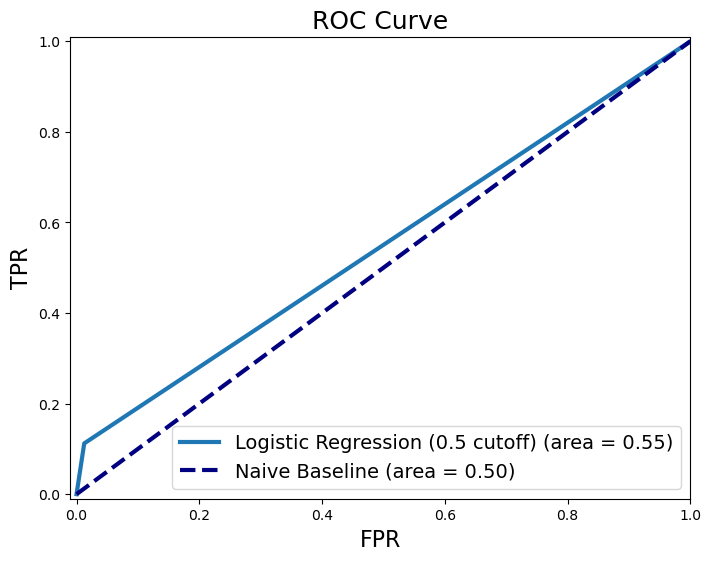

In [110]:
fpr, tpr, _ = roc_curve(c_yte, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-.01, 1.00])
plt.ylim([-.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (0.5 cutoff) (area = {:0.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [111]:
indices = c_xte.index

y_pred_res = y_pred.astype('bool').to_numpy()
frame = {'Index':indices, 'Oscar_Nominated_Logistic':y_pred_res}
log_result = pd.DataFrame(frame)
log_result.head()

,Index,Oscar_Nominated_Logistic
0,4208,False
1,4406,False
2,4422,False
3,4426,False
4,4490,False


In [80]:
log_result.to_csv('LogisticPredictions.csv', index=False)

# Decision Tree

In [80]:
train = movies_dummy[movies_dummy['Year'] <= 2000].drop_duplicates()
test = movies_dummy[movies_dummy['Year'] > 2000].drop_duplicates()

# Decision Tree Regression

In [81]:
mse = make_scorer(mean_squared_error)

In [82]:
x_train = train[['IMDB_Score', 'belongs_to_collection', 'budget', 'popularity', 'vote_count', 'Genre_Crime', 'Nominated', 'Winner']]
x_test = test[['IMDB_Score', 'belongs_to_collection', 'budget', 'popularity', 'vote_count', 'Genre_Crime', 'Nominated', 'Winner']]
y_train = train["revenue"]
y_test = test['revenue']

In [83]:
dtc = DecisionTreeRegressor()

grid_values = {'ccp_alpha': np.linspace(0, 0.010, 201),
              'min_samples_leaf': [5],
              'min_samples_split': [20],
              'max_depth': [10],
              'random_state': [88]}
dec_tree_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = mse, cv = 10, verbose = 1)
dec_tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45e...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [84]:
acc = dec_tree_cv.cv_results_['mean_test_score']
ccp = dec_tree_cv.cv_results_['param_ccp_alpha'].data

alpha_vals = pd.DataFrame({'ccp alpha' : ccp, 'Validation RMSE' : acc**.5})
highest_acc = alpha_vals[alpha_vals['Validation RMSE'] == max(alpha_vals['Validation RMSE'])]
best_alpha = highest_acc[['ccp alpha']].iloc[0,0]
best_alpha

0.0

In [85]:
y_pred_train = dec_tree_cv.best_estimator_.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on training: ', train_rmse)

y_pred_test = dec_tree_cv.best_estimator_.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on testing: ', test_rmse)

RMSE on training:  28226066.796059974
RMSE on testing:  70093476.36811893


# Decision Tree Classification

In [82]:
x_train = train[['belongs_to_collection', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Year', 'Genre_Drama', 'Genre_Documentary', 'Genre_Comedy', 'Genre_Action', 'Genre_Animation']]
x_test = test[['belongs_to_collection', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Year', 'Genre_Drama', 'Genre_Documentary', 'Genre_Comedy', 'Genre_Action', 'Genre_Animation']]
y_train = train["Nominated"]
y_test = test['Nominated']

In [83]:
dtc = DecisionTreeClassifier()

grid_values = {'ccp_alpha': np.linspace(0, 0.010, 201),
              'min_samples_leaf': [5],
              'min_samples_split': [20],
              'max_depth': [10],
              'random_state': [88]}
dec_tree_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv = 10, verbose = 1)
dec_tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.00e+00, 5.00e-05, 1.00e-04, 1.50e-04, 2.00e-04, 2.50e-04,
       3.00e-04, 3.50e-04, 4.00e-04, 4.50e-04, 5.00e-04, 5.50e-04,
       6.00e-04, 6.50e-04, 7.00e-04, 7.50e-04, 8.00e-04, 8.50e-04,
       9.00e-04, 9.50e-04, 1.00e-03, 1.05e-03, 1.10e-03, 1.15e-03,
       1.20e-03, 1.25e-03, 1.30e-03, 1.35e-03, 1.40e-03, 1.45...
       8.70e-03, 8.75e-03, 8.80e-03, 8.85e-03, 8.90e-03, 8.95e-03,
       9.00e-03, 9.05e-03, 9.10e-03, 9.15e-03, 9.20e-03, 9.25e-03,
       9.30e-03, 9.35e-03, 9.40e-03, 9.45e-03, 9.50e-03, 9.55e-03,
       9.60e-03, 9.65e-03, 9.70e-03, 9.75e-03, 9.80e-03, 9.85e-03,
       9.90e-03, 9.95e-03, 1.00e-02]),
                         'max_depth': [10], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='accuracy', verbose=1)

In [84]:
acc = dec_tree_cv.cv_results_['mean_test_score']
ccp = dec_tree_cv.cv_results_['param_ccp_alpha'].data

alpha_vals = pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy' : acc})
highest_acc = alpha_vals[alpha_vals['Validation Accuracy'] == max(alpha_vals['Validation Accuracy'])]
best_alpha = highest_acc[['ccp alpha']].iloc[0,0]
best_alpha

0.00235

In [85]:
y_pred_train = dec_tree_cv.best_estimator_.predict(x_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy on training: ', train_accuracy)

y_pred_test = dec_tree_cv.best_estimator_.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy on testing: ', test_accuracy)

Accuracy on training:  0.8969087197433654
Accuracy on testing:  0.9371069182389937


In [87]:
indices = c_xte.index

y_pred_res = y_pred_test.astype('bool')
frame = {'Index':indices, 'Oscar_Nominated_DecisionTree':y_pred_res}
dec_tree_result = pd.DataFrame(frame)
dec_tree_result.head()

,Index,Oscar_Nominated_DecisionTree
0,4208,False
1,4406,True
2,4422,True
3,4426,False
4,4490,False


In [88]:
dec_tree_result.to_csv('DecisionTreePredictions.csv', index=False)

# Random Forest

In [86]:
train = movies_dummy[movies_dummy['Year'] <= 2000].drop_duplicates()
test = movies_dummy[movies_dummy['Year'] > 2000].drop_duplicates()

## Random Forest Regression

In [423]:
x_train = train[['IMDB_Score', 'belongs_to_collection', 'budget', 'popularity', 'vote_count', 'Genre_Crime', 'Nominated', 'Winner']]
x_test = test[['IMDB_Score', 'belongs_to_collection', 'budget', 'popularity', 'vote_count', 'Genre_Crime', 'Nominated', 'Winner']]
y_train = train["revenue"]
y_test = test['revenue']

In [425]:
grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf = RandomForestRegressor()   
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring= mse, cv=10,verbose=0).fit(x_train, y_train)

In [428]:
rf_crf_best_model = RandomForestRegressor(max_features = rf_cv.best_params_['max_features'], min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=0).fit(x_train, y_train)
y_pred_train = rf_crf_best_model.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE on training: ', train_rmse)

y_pred_test = rf_crf_best_model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE on testing: ', test_rmse)

RMSE on training:  30170832.59798435
RMSE on testing:  75727885.79247136


## Random Forest Classification

In [91]:
x_train = train[['belongs_to_collection', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Year', 'Genre_Drama', 'Genre_Documentary', 'Genre_Comedy', 'Genre_Action', 'Genre_Animation']]
x_test = test[['belongs_to_collection', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'Year', 'Genre_Drama', 'Genre_Documentary', 'Genre_Comedy', 'Genre_Action', 'Genre_Animation']]
y_train = train["Nominated"]
y_test = test['Nominated']

In [92]:
grid_values = {'max_features': np.linspace(1,12,12, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestClassifier()   
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=10,verbose=0).fit(x_train, y_train)

In [93]:
rf_crf_best_model = RandomForestClassifier(max_features = rf_cv.best_params_['max_features'], min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=0)
rf_crf_best_model.fit(x_train, y_train)
rf_crf_pred = rf_crf_best_model.predict(x_test)
model_2e_acc = sum(rf_crf_pred == y_test) / len(y_test)
print('Accuracy on testing: ', model_2e_acc)

Accuracy on testing:  0.9582618639222413


In [99]:
indices = c_xte.index

y_pred_res = rf_crf_pred.astype('bool')
frame = {'Index':indices, 'Oscar_Nominated_RandomForest':y_pred_res}
rf_result = pd.DataFrame(frame)
rf_result.head()

,Index,Oscar_Nominated_RandomForest
0,4208,False
1,4406,False
2,4422,True
3,4426,False
4,4490,False


In [100]:
rf_result.to_csv('RFPredictions.csv', index=False)

# Ensemble 

In [88]:
train = movies_dummy[movies_dummy['Year'] <= 2000].drop_duplicates()
test = movies_dummy[movies_dummy['Year'] > 2000].drop_duplicates()

In [89]:
decision_tree_preds = pd.read_csv("DecisionTreePredictions.csv")
logistic_preds = pd.read_csv("LogisticPredictions.csv")
rf_preds = pd.read_csv("RFPredictions.csv")

In [90]:
df = pd.DataFrame()
df['Index'] = rf_preds['Index']
df['OscarNominated_DecisionTree'] = decision_tree_preds['Oscar_Nominated_DecisionTree']
df['OscarNominated_NeuralNetwork'] = rf_preds['Oscar_Nominated_RandomForest']
df['OscarNominated_Logistic'] = logistic_preds['Oscar_Nominated_Logistic']
df['Mean'] = (df['OscarNominated_DecisionTree'] + df['OscarNominated_NeuralNetwork'] + df['OscarNominated_Logistic']) / 3
df['OscarNominated'] = [True if test > 0.5 else False for test in df['Mean']]
df

,Index,OscarNominated_DecisionTree,OscarNominated_NeuralNetwork,OscarNominated_Logistic,Mean,OscarNominated
0,4208,False,False,False,0.000000,False
1,4406,True,False,False,0.333333,False
2,4422,True,True,False,0.333333,False
3,4426,False,False,False,0.000000,False
4,4490,False,False,False,0.000000,False
...,...,...,...,...,...,...
5242,42265,False,False,False,0.000000,False
5243,42271,False,False,False,0.000000,False
5244,42274,False,False,False,0.000000,False
5245,42276,False,False,False,0.000000,False


In [91]:
ensemble_df = df.loc[:, ['Index', 'OscarNominated']]
ensemble_df

,Index,OscarNominated
0,4208,False
1,4406,False
2,4422,False
3,4426,False
4,4490,False
...,...,...
5242,42265,False
5243,42271,False
5244,42274,False
5245,42276,False


In [92]:
y_true = test['Nominated'].to_numpy()
y_pred = ensemble_df['OscarNominated'].to_numpy()
print(accuracy_score(y_true, y_pred))

0.9592147894034686
